In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [72]:
pd.read_csv('data/input/train.csv')

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [73]:
df = pd.read_csv('data/train-2.csv')

In [74]:
dataframe = df

In [75]:
def get_variable_category(series):
    '''Acquire category of variables: numerical, date, text or categorical. Credit: Sian Lewis'''
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count == total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'


def print_variable_categories(dataframe):
    '''Print categories for each variable. Credit: Sian Lewis'''
    for column_name in dataframe.columns:
        print(column_name, ': ', get_variable_category(dataframe[column_name]))

def missing_values_table(df):
    '''Print missing values of dataframe in table for each variable, Credit: Sian Lewis'''
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
    "There are " + str(mis_val_table_ren_columns.shape[0]) +
    " columns that have missing values.")
    return mis_val_table_ren_columns        

def datainspect(dataframe):
    '''Print data exploration information. Credit: Ritika Basher, Matt Speck, Sian Lewis'''
    print('ROWS AND COLUMNS: \n', dataframe.shape, '\n')
    print('MISSING VALUES: \n', dataframe.isnull().sum(), '\n')
    print('DUPLICATE ROWS \n', dataframe.duplicated().sum(), '\n')
    print('DATA TYPES: \n', dataframe.dtypes, "\n")
    print('DATAFRAME DESCRIBE: \n \n', dataframe.describe(include='all'), '\n')
    print('UNIQUE VALUES:')
    for item in dataframe:
        print(item, dataframe[item].nunique())
    print('\n')
    print('VARIABLE CATEGORIES:', '\n')
    print(print_variable_categories(dataframe))
    print('MISSING MATRIX:', '\n')
    print(missing_values_table(dataframe))
    print(dataframe.head())

In [76]:
print_variable_categories(dataframe)

Date :  Categorical
Address :  Categorical
Species :  Categorical
Block :  Numerical
Street :  Categorical
Trap :  Categorical
AddressNumberAndStreet :  Categorical
Latitude :  Numerical
Longitude :  Numerical
AddressAccuracy :  Numerical
NumMosquitos :  Numerical
WnvPresent :  Numerical


In [77]:
missing_values_table(dataframe)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [78]:
df.shape

(10506, 12)

In [79]:
datainspect(dataframe)

ROWS AND COLUMNS: 
 (10506, 12) 

MISSING VALUES: 
 Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64 

DUPLICATE ROWS 
 813 

DATA TYPES: 
 Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object 

DATAFRAME DESCRIBE: 
 
               Date                                            Address  \
count        10506                     

In [80]:
df.head(n=15)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [81]:
pd.read_csv('spray.csv')

FileNotFoundError: File b'spray.csv' does not exist

In [82]:
spray = pd.read_csv('spray.csv')

FileNotFoundError: File b'spray.csv' does not exist

In [83]:
pd.read_csv('weather.csv')

FileNotFoundError: File b'weather.csv' does not exist

In [84]:
df['WnvPresent']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
10476    0
10477    0
10478    0
10479    0
10480    0
10481    0
10482    0
10483    0
10484    1
10485    0
10486    0
10487    0
10488    0
10489    0
10490    0
10491    0
10492    0
10493    0
10494    0
10495    0
10496    0
10497    0
10498    0
10499    0
10500    0
10501    1
10502    0
10503    0
10504    0
10505    0
Name: WnvPresent, Length: 10506, dtype: int64

In [85]:
#Is West Nile Virus present?
df[df['WnvPresent'] == 1]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
553,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,50,1
603,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1
611,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1
618,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1
660,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1
661,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1
777,2007-08-01,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,50,1
778,2007-08-01,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,21,1
784,2007-08-01,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,5,1
812,2007-08-01,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,33,1


In [86]:
virus_present = df[df['WnvPresent'] == 1]

In [87]:
virus_present['Species'].value_counts()

CULEX PIPIENS/RESTUANS    262
CULEX PIPIENS             240
CULEX RESTUANS             49
Name: Species, dtype: int64

In [88]:
# Doing a Linear Regression

In [89]:
virus_present.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [90]:
features = ['Block', 'Latitude', 'Longitude', 'NumMosquitos']

In [91]:
X = df[features]

In [92]:
y = df['WnvPresent']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [94]:
X_train.shape

(7879, 4)

In [95]:
X_test.shape

(2627, 4)

In [96]:
X.shape

(10506, 4)

In [97]:
lr = LinearRegression()
cross_val_score(lr, X_train, y_train, cv=10).mean()

0.046169472960722345

In [98]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.03830963181326952

In [99]:
pd.to_datetime(df['Date'])

0       2007-05-29
1       2007-05-29
2       2007-05-29
3       2007-05-29
4       2007-05-29
5       2007-05-29
6       2007-05-29
7       2007-05-29
8       2007-05-29
9       2007-05-29
10      2007-05-29
11      2007-05-29
12      2007-05-29
13      2007-05-29
14      2007-05-29
15      2007-05-29
16      2007-05-29
17      2007-05-29
18      2007-05-29
19      2007-05-29
20      2007-05-29
21      2007-05-29
22      2007-05-29
23      2007-05-29
24      2007-05-29
25      2007-06-05
26      2007-06-05
27      2007-06-05
28      2007-06-05
29      2007-06-05
           ...    
10476   2013-09-26
10477   2013-09-26
10478   2013-09-26
10479   2013-09-26
10480   2013-09-26
10481   2013-09-26
10482   2013-09-26
10483   2013-09-26
10484   2013-09-26
10485   2013-09-26
10486   2013-09-26
10487   2013-09-26
10488   2013-09-26
10489   2013-09-26
10490   2013-09-26
10491   2013-09-26
10492   2013-09-26
10493   2013-09-26
10494   2013-09-26
10495   2013-09-26
10496   2013-09-26
10497   2013

In [100]:
virus_present['Date'].value_counts()

2013-08-29    38
2007-08-15    37
2013-08-08    34
2007-08-22    33
2007-08-21    32
2013-09-06    32
2013-08-22    30
2007-08-24    25
2013-09-12    23
2013-08-01    22
2013-08-15    20
2007-08-01    18
2007-08-16    16
2013-07-19    15
2007-08-07    12
2011-08-12    11
2013-09-19    11
2007-09-05    10
2007-08-28     9
2007-09-04     8
2011-07-29     8
2007-08-17     7
2009-08-25     7
2007-08-08     7
2013-07-12     7
2011-09-12     6
2011-09-23     6
2007-07-25     5
2007-09-12     5
2011-08-05     5
2011-08-19     4
2013-09-26     4
2011-09-01     4
2011-08-26     4
2011-09-16     3
2007-08-02     3
2011-09-02     3
2009-09-14     3
2011-07-25     3
2007-09-06     2
2009-08-13     2
2009-07-27     2
2007-10-04     2
2007-09-24     2
2009-07-24     2
2013-07-25     2
2009-07-31     1
2013-06-28     1
2009-09-03     1
2009-09-25     1
2007-07-18     1
2007-09-19     1
2007-08-09     1
Name: Date, dtype: int64

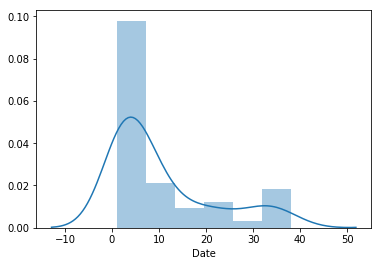

In [101]:
sns.distplot(virus_present['Date'].value_counts())

In [102]:
virus_present['Date'].value_counts()

2013-08-29    38
2007-08-15    37
2013-08-08    34
2007-08-22    33
2007-08-21    32
2013-09-06    32
2013-08-22    30
2007-08-24    25
2013-09-12    23
2013-08-01    22
2013-08-15    20
2007-08-01    18
2007-08-16    16
2013-07-19    15
2007-08-07    12
2011-08-12    11
2013-09-19    11
2007-09-05    10
2007-08-28     9
2007-09-04     8
2011-07-29     8
2007-08-17     7
2009-08-25     7
2007-08-08     7
2013-07-12     7
2011-09-12     6
2011-09-23     6
2007-07-25     5
2007-09-12     5
2011-08-05     5
2011-08-19     4
2013-09-26     4
2011-09-01     4
2011-08-26     4
2011-09-16     3
2007-08-02     3
2011-09-02     3
2009-09-14     3
2011-07-25     3
2007-09-06     2
2009-08-13     2
2009-07-27     2
2007-10-04     2
2007-09-24     2
2009-07-24     2
2013-07-25     2
2009-07-31     1
2013-06-28     1
2009-09-03     1
2009-09-25     1
2007-07-18     1
2007-09-19     1
2007-08-09     1
Name: Date, dtype: int64

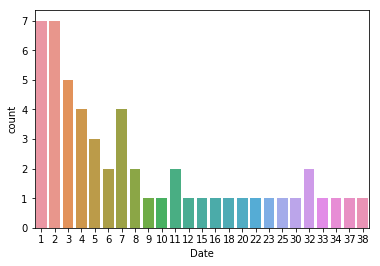

In [103]:
sns.countplot(virus_present['Date'].value_counts())

In [104]:
virus_present.sort_values(by='Date')

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
553,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,50,1
603,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1
611,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1
618,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1
660,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1
661,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1
1310,2007-08-01,"South Avenue L, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,11,S AVENUE L,T103,"1100 S AVENUE L, Chicago, IL",41.702724,-87.536497,5,50,1
1309,2007-08-01,"South Avenue L, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,11,S AVENUE L,T103,"1100 S AVENUE L, Chicago, IL",41.702724,-87.536497,5,50,1
1306,2007-08-01,"South Avenue L, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,11,S AVENUE L,T103,"1100 S AVENUE L, Chicago, IL",41.702724,-87.536497,5,50,1
1250,2007-08-01,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,16,1


In [105]:
virus_present_date = virus_present.sort_values(by='Date')

In [107]:
virus_present.groupby(virus_present["Date"].dt.month).count().plot(kind="bar")

AttributeError: Can only use .dt accessor with datetimelike values

In [108]:
virus_present['Date'].count()

551

In [109]:
is_present['Species'].value_counts()

CULEX PIPIENS/RESTUANS    262
CULEX PIPIENS             240
CULEX RESTUANS             49
Name: Species, dtype: int64

In [1]:
# df['Date'].str[0:4].astype(int)

In [111]:
df['By Year'] = df['Date'].str[0:4].astype(int)

In [112]:
df

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,By Year
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0,2007
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0,2007
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0,2007
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0,2007
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0,2007


In [113]:
df[df['WnvPresent'] == 1]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,By Year
553,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,50,1,2007
603,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1,2007
611,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1,2007
618,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1,2007
660,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1,2007
661,2007-07-25,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1,2007
777,2007-08-01,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,50,1,2007
778,2007-08-01,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,21,1,2007
784,2007-08-01,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,5,1,2007
812,2007-08-01,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,33,1,2007


In [114]:
is_present = df[df['WnvPresent'] == 1]

In [115]:
is_present['By Year'].value_counts()

2013    239
2007    236
2011     57
2009     19
Name: By Year, dtype: int64

In [116]:
df['By Year'].value_counts()

2007    3811
2013    2392
2009    2249
2011    2054
Name: By Year, dtype: int64

In [117]:
by_percentage = is_present['By Year'].value_counts() / df['By Year'].value_counts() *100

In [118]:
by_percentage

2007    6.192600
2009    0.844820
2011    2.775073
2013    9.991639
Name: By Year, dtype: float64

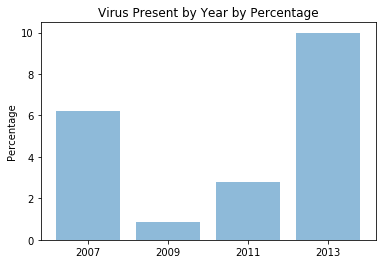

In [119]:
import matplotlib.pyplot as plt
 
objects = ('2007', '2009', '2011', '2013')
y_pos = np.arange(len(objects))
performance = [6.19,0.84,2.77,9.99]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Virus Present by Year by Percentage')
 
plt.show()

In [120]:
is_present['By Month'] = is_present['Date'].str[5:7].astype(int).value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


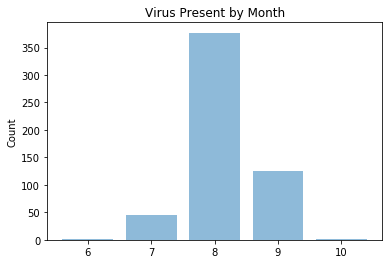

In [121]:
import matplotlib.pyplot as plt
 
objects = ('6', '7', '8', '9', '10')
y_pos = np.arange(len(objects))
performance = [1, 46, 377, 125, 2]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Virus Present by Month')
 
plt.show()

In [122]:
is_present['By Month'] = is_present['Date'].str[5:7].astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
weather = pd.read_csv('data/input/weather.csv')

In [126]:
weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [127]:
weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [128]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [129]:
min(weather['Date'])


'2007-05-01'

In [130]:
weather.shape

(2944, 22)

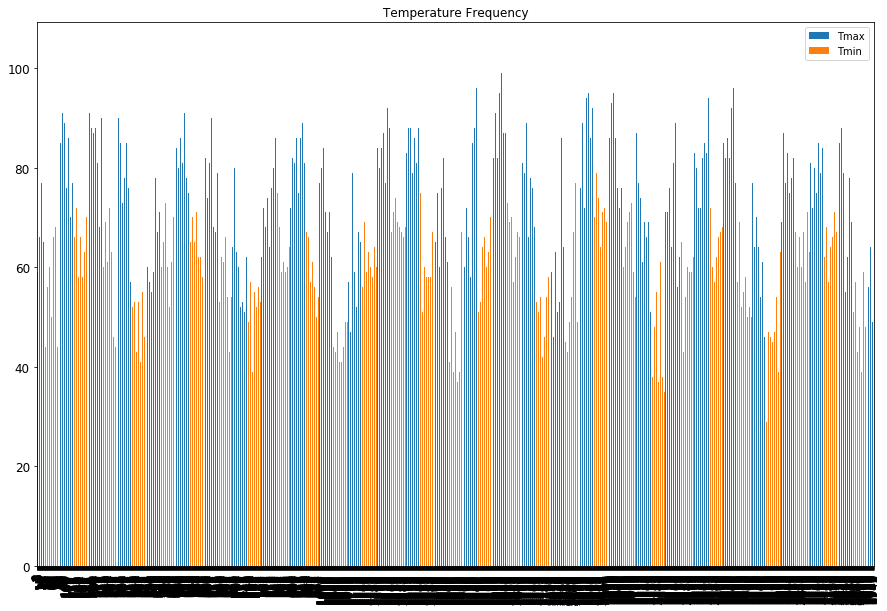

In [131]:
weather[['Date','Tmax', 'Tmin']].plot(kind='bar', title ="Temperature Frequency", figsize=(15, 10), legend=True, fontsize=12)

In [132]:
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [133]:
#get temperatures by year then do a groupby
weather['By Year'] = weather['Date'].str[0:4].astype(int)


In [134]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,By Year
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2,2007
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,M,M,M,0.00,29.18,29.82,2.7,25,9.6,2007
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4,2007
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,M,M,M,0.00,29.44,30.08,13.3,2,13.4,2007
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9,2007


In [ ]:
# sum of a column

# can use a groupby and sum

# or could filter using a boolean mask and take sum
PrepByYear = [each.sum() for each in weather['By Year'] if weather['By Year']== '2007']
PrepByYear

In [ ]:
weather['By Year'].value_counts()

In [128]:
weather['By Year'].sort_values(ascending=True).value_counts()

2013    368
2011    368
2009    368
2007    368
2014    368
2012    368
2010    368
2008    368
Name: By Year, dtype: int64

In [139]:
weather['By Year'].value_counts(ascending=True)

#Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

2008    368
2010    368
2012    368
2014    368
2007    368
2009    368
2011    368
2013    368
Name: By Year, dtype: int64

In [143]:
weather.groupby(['By Year'])['Tmax'].mean()

By Year
2007    78.480978
2008    75.013587
2009    72.510870
2010    77.521739
2011    75.769022
2012    78.687500
2013    75.932065
2014    75.413043
Name: Tmax, dtype: float64

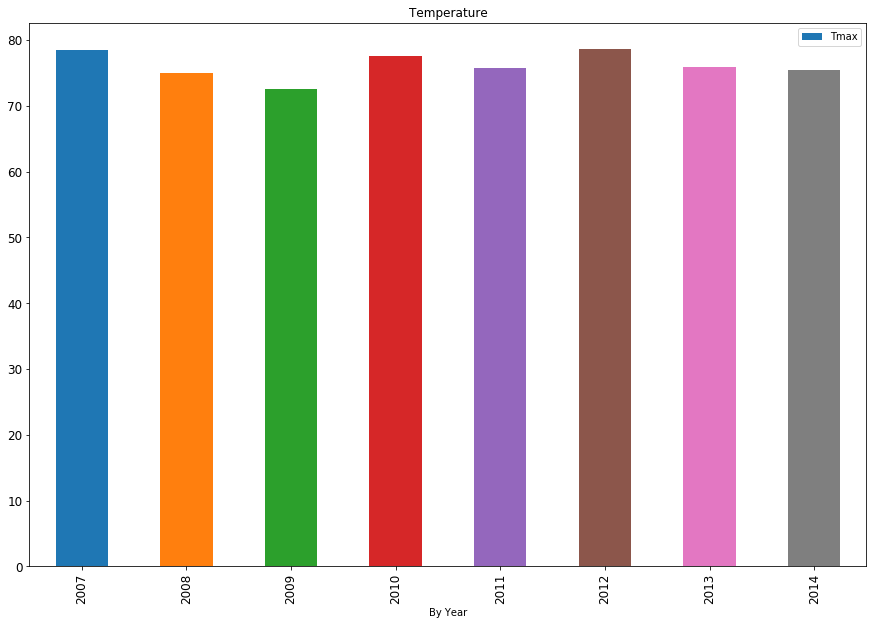

In [168]:
weather.groupby(['By Year'])['Tmax'].mean().plot(
    kind='bar', title ="Temperature", figsize=(15, 10), legend=True, fontsize=12)

In [147]:
#Looking at data by month

weather['Date'].str[5:7].astype(int)

0        5
1        5
2        5
3        5
4        5
5        5
6        5
7        5
8        5
9        5
10       5
11       5
12       5
13       5
14       5
15       5
16       5
17       5
18       5
19       5
20       5
21       5
22       5
23       5
24       5
25       5
26       5
27       5
28       5
29       5
        ..
2914    10
2915    10
2916    10
2917    10
2918    10
2919    10
2920    10
2921    10
2922    10
2923    10
2924    10
2925    10
2926    10
2927    10
2928    10
2929    10
2930    10
2931    10
2932    10
2933    10
2934    10
2935    10
2936    10
2937    10
2938    10
2939    10
2940    10
2941    10
2942    10
2943    10
Name: Date, Length: 2944, dtype: int64

In [154]:
weather['By Month'] = weather['Date'].str[5:7].astype(int)

In [155]:
weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,By Year,By Month
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,M,0.0,0.00,29.10,29.82,1.7,27,9.2,2007,5
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,M,M,0.00,29.18,29.82,2.7,25,9.6,2007,5
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,M,0.0,0.00,29.38,30.09,13.0,4,13.4,2007,5
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,M,M,0.00,29.44,30.08,13.3,2,13.4,2007,5
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,M,0.0,0.00,29.39,30.12,11.7,7,11.9,2007,5
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,M,M,0.00,29.46,30.12,12.9,6,13.2,2007,5
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,M,0.0,T,29.31,30.05,10.4,8,10.8,2007,5
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,M,M,0.00,29.36,30.04,10.1,7,10.4,2007,5
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,M,0.0,T,29.40,30.10,11.7,7,12.0,2007,5
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,M,M,T,29.46,30.09,11.2,7,11.5,2007,5


In [156]:
weather.groupby(['By Year', 'By Month'])['Tmax'].mean()

By Year  By Month
2007     5           75.758065
         6           81.433333
         7           83.177419
         8           83.048387
         9           79.200000
         10          68.387097
2008     5           66.129032
         6           81.016667
         7           84.112903
         8           81.774194
         9           75.383333
         10          61.870968
2009     5           70.677419
         6           77.183333
         7           78.629032
         8           79.225806
         9           74.066667
         10          55.483871
2010     5           71.193548
         6           80.216667
         7           87.080645
         8           85.451613
         9           74.383333
         10          66.790323
2011     5           68.354839
         6           79.516667
         7           88.967742
         8           82.612903
         9           70.216667
         10          64.887097
2012     5           75.935484
         6           

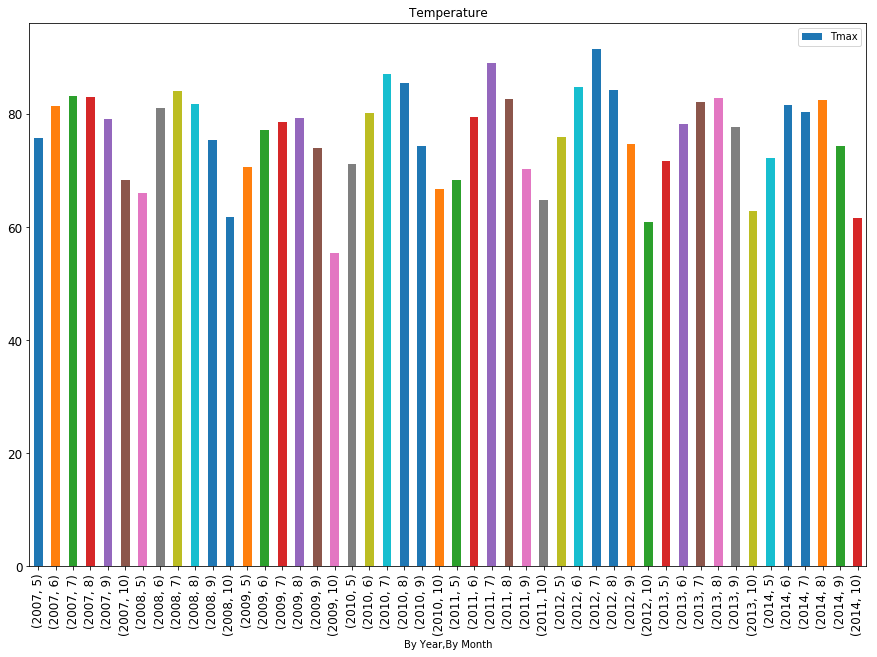

In [167]:
weather.groupby(['By Year', 'By Month'])['Tmax'].mean().plot(kind='bar', title ="Temperature", figsize=(15, 10), legend=True, fontsize=12)

#plt.axvline('Tmax'.mean(), color='k', linestyle='dashed', linewidth=1)

In [162]:
weather['Tmax'].mean()

76.16610054347827

In [170]:
weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
By Year          int64
By Month         int64
dtype: object

In [208]:
pd.Series(['hello', 'world']).sum()

'helloworld'

In [204]:
weather[weather['PrecipTotal']== '  T']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,By Year,By Month
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,M,0.0,T,29.31,30.05,10.4,8,10.8,2007,5
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,M,0.0,T,29.40,30.10,11.7,7,12.0,2007,5
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,M,M,T,29.46,30.09,11.2,7,11.5,2007,5
12,1,2007-05-07,83,47,65,10,41,54,0,0,...,M,0.0,T,29.38,30.12,8.6,18,10.5,2007,5
15,2,2007-05-08,80,60,70,M,57,63,0,5,...,M,M,T,29.36,30.02,2.5,8,5.4,2007,5
47,2,2007-05-24,88,66,77,M,53,63,0,12,...,M,M,T,29.47,30.10,13.8,20,15.2,2007,5
48,1,2007-05-25,70,56,63,1,44,53,2,0,...,M,0.0,T,29.51,30.24,4.9,5,8.8,2007,5
54,1,2007-05-28,79,50,65,2,47,56,0,0,...,M,0.0,T,29.43,30.15,4.8,10,5.3,2007,5
65,2,2007-06-02,81,68,75,M,62,67,0,10,...,M,M,T,29.10,29.76,7.5,21,8.2,2007,6
73,2,2007-06-06,73,48,61,M,47,55,4,0,...,M,M,T,29.13,29.82,9.6,15,10.6,2007,6


In [206]:
sum(weather['PrecipTotal'] == '  T')

318

In [200]:
weather['PrecipTotal']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
5       0.00
6          T
7       0.00
8          T
9          T
10      0.00
11      0.00
12         T
13      0.00
14      0.00
15         T
16      0.13
17      0.02
18      0.00
19      0.00
20      0.00
21      0.00
22      0.00
23      0.00
24      0.00
25      0.00
26      0.00
27      0.00
28      0.38
29      0.60
        ... 
2914       T
2915    0.01
2916    0.01
2917    0.02
2918    0.00
2919    0.00
2920    0.01
2921    0.00
2922    0.00
2923    0.00
2924    0.00
2925    0.00
2926    0.00
2927       T
2928    0.00
2929    0.00
2930    0.00
2931    0.00
2932    0.00
2933    0.00
2934    0.00
2935    0.02
2936       T
2937    0.03
2938    0.00
2939    0.00
2940    0.00
2941       T
2942    0.03
2943    0.04
Name: PrecipTotal, Length: 2944, dtype: object

In [185]:
weather.loc[6, 'PrecipTotal']

'  T'